My goal for task 1 is to take the cats and dogs database and use a CNN to classify the images as cat or dog. 



In [177]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
import keras 
import pathlib
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import VGG16

In [178]:
cats_training_path = pathlib.Path("dogs_cats/dataset/training_set/cats")
dogs_training_path = pathlib.Path("dogs_cats/dataset/training_set/dogs")
cats_test_path = pathlib.Path("dogs_cats/dataset/test_set/cats")
dogs_test_path = pathlib.Path("dogs_cats/dataset/test_set/dogs")
training_path = pathlib.Path("dogs_cats/dataset/training_set")
test_path = pathlib.Path("dogs_cats/dataset/test_set")

In [179]:
datagen = ImageDataGenerator(rescale=1./255)

In [180]:
data = datagen.flow_from_directory(    
    training_path,
    target_size = (200,200),
    class_mode = 'binary',
     batch_size=64,
)

Found 8000 images belonging to 2 classes.


In [181]:
print(data.class_indices)

{'cats': 0, 'dogs': 1}


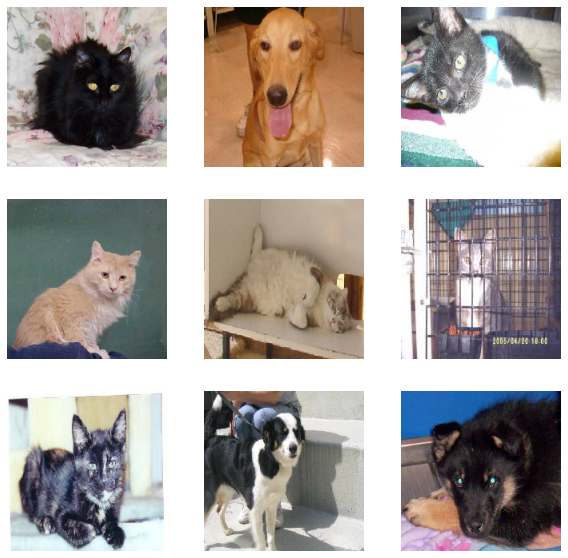

In [182]:
#plot top make sure images render correctly
x, y= data.next()
plt.figure(figsize=(10, 10))
for i in range(9):
    image = x[i]
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.axis("off")

In [183]:
model = keras.models.Sequential()


model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [184]:
test_data = ImageDataGenerator(rescale=1./255)
validation_generator = test_data.flow_from_directory(
        test_path, 
        target_size=(200, 200),  
        batch_size=64,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [185]:
history = model.fit(
    data,
    steps_per_epoch=25,
    epochs = 25,
    validation_data=validation_generator,
    validation_steps=25
)

Epoch 1/25
25/25 [==============================] - 57s 2s/step - loss: 1.9850 - accuracy: 0.5769 - val_loss: 0.9025 - val_accuracy: 0.5263
Epoch 2/25
25/25 [==============================] - 52s 2s/step - loss: 0.6975 - accuracy: 0.6194 - val_loss: 0.7182 - val_accuracy: 0.5081
Epoch 3/25
25/25 [==============================] - 52s 2s/step - loss: 0.6210 - accuracy: 0.6762 - val_loss: 1.2190 - val_accuracy: 0.5000
Epoch 4/25
25/25 [==============================] - 53s 2s/step - loss: 0.6413 - accuracy: 0.6500 - val_loss: 1.2553 - val_accuracy: 0.4963
Epoch 5/25
25/25 [==============================] - 59s 2s/step - loss: 0.6181 - accuracy: 0.6587 - val_loss: 0.8440 - val_accuracy: 0.5044
Epoch 6/25
25/25 [==============================] - 52s 2s/step - loss: 0.5584 - accuracy: 0.7044 - val_loss: 3.3540 - val_accuracy: 0.4981
Epoch 7/25
25/25 [==============================] - 52s 2s/step - loss: 0.5433 - accuracy: 0.7262 - val_loss: 0.8376 - val_accuracy: 0.5044
Epoch 8/25
25/25 [==

In [186]:
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('Final Testing Accuracy With The Test Data > %.3f' % (acc * 100.0))

32/32 [==============================] - 12s 382ms/step - loss: 0.8821 - accuracy: 0.6625
Final Testing Accuracy With The Test Data > 66.250


In [188]:
Y_pred = model.predict(validation_generator, 2000 //65)
y_pred=np.where(Y_pred>0.5, 1, 0)


In [196]:
img_rows, img_cols, img_channel = 200, 200, 3
vgg = VGG16(include_top=False, weights='imagenet', 
                                     input_shape=(img_rows, img_cols, img_channel))
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = keras.layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = keras.layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = keras.layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = keras.layers.Dense(1, activation='sigmoid')(x)


model_vgg.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, None, None, 32)    896       
_________________________________________________________________
batch_normalization_16 (Batc (None, None, None, 32)    128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, None, None, 32)    9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, None, None, 32)    128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, None, None, 64)  

In [221]:
history = model_vgg.fit_generator(
    data,
    epochs=4,
    validation_data=validation_generator,
    validation_steps=25,
    steps_per_epoch=25)

Epoch 1/4


InvalidArgumentError:  Incompatible shapes: [64,6,6] vs. [64,1]
	 [[node Equal (defined at <ipython-input-221-368af0aedcb0>:1) ]] [Op:__inference_train_function_48473]

Function call stack:
train_function


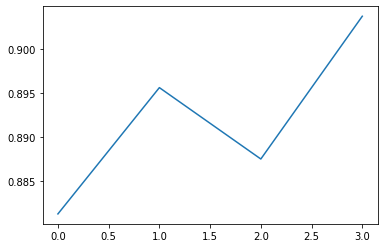

In [209]:
plt.plot(history.history['accuracy'])


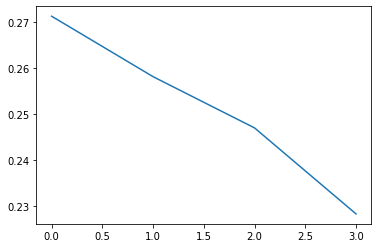

In [203]:
plt.plot(history.history['loss'])

In [210]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [212]:
train_generator = train_datagen.flow_from_directory(
    training_path,  
    class_mode='binary',
    target_size=(200,200),
    batch_size=64
)

Found 8000 images belonging to 2 classes.


In [213]:
history_task_3 = model.fit(
    data,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=25,
    steps_per_epoch=25)

Epoch 1/25
25/25 [==============================] - 51s 2s/step - loss: 0.2339 - accuracy: 0.8969 - val_loss: 0.5777 - val_accuracy: 0.7531
Epoch 2/25
25/25 [==============================] - 53s 2s/step - loss: 0.2235 - accuracy: 0.9000 - val_loss: 0.9392 - val_accuracy: 0.7181
Epoch 3/25
25/25 [==============================] - 51s 2s/step - loss: 0.2292 - accuracy: 0.9013 - val_loss: 0.5636 - val_accuracy: 0.7881
Epoch 4/25
25/25 [==============================] - 53s 2s/step - loss: 0.2031 - accuracy: 0.9200 - val_loss: 0.6595 - val_accuracy: 0.7731
Epoch 5/25
25/25 [==============================] - 55s 2s/step - loss: 0.1919 - accuracy: 0.9194 - val_loss: 0.5836 - val_accuracy: 0.7812
Epoch 6/25
25/25 [==============================] - 55s 2s/step - loss: 0.2211 - accuracy: 0.9019 - val_loss: 0.5210 - val_accuracy: 0.8056
Epoch 7/25
25/25 [==============================] - 58s 2s/step - loss: 0.2076 - accuracy: 0.9100 - val_loss: 0.5591 - val_accuracy: 0.7894
Epoch 8/25
25/25 [==

Text(0.5, 0, 'epoch')

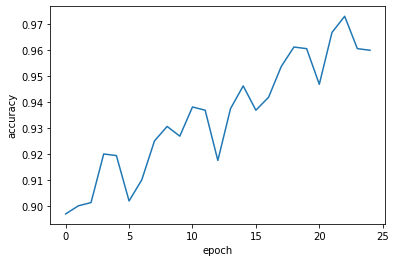

In [216]:
plt.plot(history_task_3.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

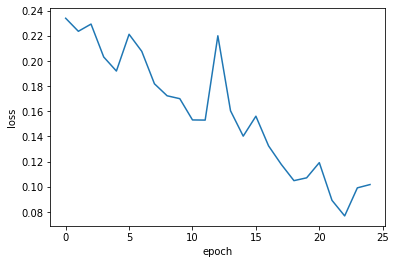

In [217]:
plt.plot(history_task_3.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [219]:
Y_pred_3 = model.predict(validation_generator, 2000 //65)
y_pred_3=np.where(Y_pred>0.5, 1, 0)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
